In [44]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Atividade7

In [45]:
## importando a base de dados
base = pd.read_csv("ionosphere-1.data")

In [46]:
## criando o cabeçalho e trocando os valores do coluna 34
base2 = pd.read_csv("ionosphere-1.data", header = None)
base2[34].replace({"g":1}, inplace =True)
base2[34].replace({"b":0}, inplace =True)

In [58]:
##Separando X e y para treino
X = base2[base2.columns[:-1]]
y = base2[base2.columns[-1:]]

# Criando o modelo através de um número de componentes principais definido pela porcentagem de variancia
pca = PCA(n_components = 0.85)

# Aplicando a PCA
P = pca.fit_transform(X)

print(P)

[[-8.59332860e-01 -9.61406757e-01 -5.86082357e-01 ... -2.20153653e-01
  -5.97801527e-02  2.20999195e-01]
 [ 7.65524410e-01 -1.06271411e+00 -1.39733865e+00 ... -3.10716437e-01
   4.21973385e-02  3.73263689e-01]
 [-1.11681736e+00 -3.92255939e-01  7.98828031e-03 ...  5.08177609e-03
  -1.26084501e-01  7.63168548e-02]
 ...
 [-2.00968648e+00  7.02142791e-03  3.45603502e-01 ...  2.02097514e-02
   1.44435820e-03 -2.71935018e-02]
 [-1.87850608e+00 -2.58263391e-01  2.79973413e-01 ... -4.80431587e-03
  -9.00198385e-02 -5.09193423e-02]
 [-1.54878315e+00 -1.87526433e-01  2.17570815e-01 ...  1.00494072e-01
  -1.09900783e-01  3.83997994e-02]]


In [48]:
## Separando os dados em dados de treinamento e teste utilizando a proporção 70% e 30%, respectivamente, e random state = 0.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [51]:
model = LogisticRegression(fit_intercept=True) 
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
## modelo de predição
y_pred = model.predict(X_test) 

In [54]:
## Realizando a classificação e obtendo os seguintes resultados: Acurácia, Precisão, Recall, F1-Score
#print("Acurácia: : ", accuracy_score(y_test, y_pred)*100)
acc = accuracy_score(y_test, y_pred)*100 # calcular a acurácia do modelo
print(f"Acurácia do modelo: {acc:.2f}%")

Acurácia do modelo: 88.68%


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        44
           1       0.84      1.00      0.91        62

    accuracy                           0.89       106
   macro avg       0.92      0.86      0.88       106
weighted avg       0.91      0.89      0.88       106



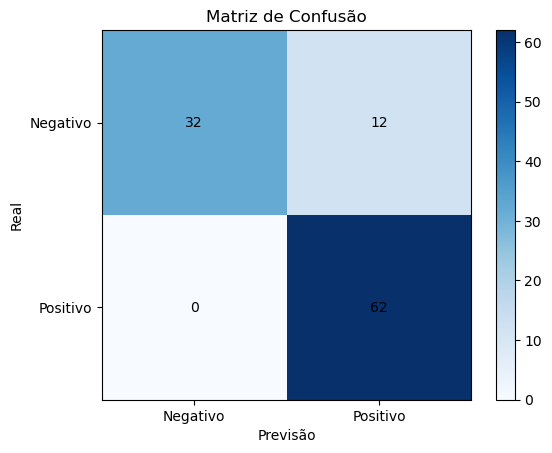

In [56]:
## Plotando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão')
plt.colorbar()
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.yticks([0, 1], ['Negativo', 'Positivo'])
plt.xlabel('Previsão')
plt.ylabel('Real')
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
plt.show()